### Importing Libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data set and exploring the features

In [12]:
df_cab = pd.read_csv("/Users/PKLAT/repos/week2/DataSets/Cab_Data.csv")

In [13]:
df_city = pd.read_csv("/Users/PKLAT/repos/week2/DataSets/City.csv", thousands=',')

In [14]:
df_customer = pd.read_csv("/Users/PKLAT/repos/week2/DataSets/Customer_ID.csv")

In [15]:
df_transaction = pd.read_csv("/Users/PKLAT/repos/week2/DataSets/Transaction_ID.csv")

In [16]:
df_cab.shape

(359392, 7)

In [17]:
df_city.shape

(20, 3)

In [18]:
df_customer.shape

(49171, 4)

In [19]:
df_transaction.shape

(440098, 3)

In [20]:
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08/01/16,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06/01/16,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02/01/16,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07/01/16,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03/01/16,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [21]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [22]:
df_cab["Date of Travel"] = pd.to_datetime(df_cab["Date of Travel"])

In [23]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [24]:
df_cab["Company"].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [25]:
df_cab.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [26]:
df_cab["Transaction ID"].nunique()

359392

In [27]:
df_cab["City"].nunique()

19

In [28]:
df_cab["Date of Travel"].nunique()

1095

In [29]:
df_city.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [30]:
df_city['City'].nunique()

20

In [31]:
df_city.shape

(20, 3)

In [32]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [33]:
set(df_cab["City"]) & set(df_city['City'])

{'ATLANTA GA',
 'AUSTIN TX',
 'BOSTON MA',
 'CHICAGO IL',
 'DALLAS TX',
 'DENVER CO',
 'LOS ANGELES CA',
 'MIAMI FL',
 'NASHVILLE TN',
 'NEW YORK NY',
 'ORANGE COUNTY',
 'PHOENIX AZ',
 'PITTSBURGH PA',
 'SACRAMENTO CA',
 'SAN DIEGO CA',
 'SEATTLE WA',
 'SILICON VALLEY',
 'TUCSON AZ',
 'WASHINGTON DC'}

In [34]:
set(df_city['City'])

{'ATLANTA GA',
 'AUSTIN TX',
 'BOSTON MA',
 'CHICAGO IL',
 'DALLAS TX',
 'DENVER CO',
 'LOS ANGELES CA',
 'MIAMI FL',
 'NASHVILLE TN',
 'NEW YORK NY',
 'ORANGE COUNTY',
 'PHOENIX AZ',
 'PITTSBURGH PA',
 'SACRAMENTO CA',
 'SAN DIEGO CA',
 'SAN FRANCISCO CA',
 'SEATTLE WA',
 'SILICON VALLEY',
 'TUCSON AZ',
 'WASHINGTON DC'}

## Linking cab and city data

In [36]:
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [37]:
df_city.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [38]:
Population = []
Users = []
for i in df_cab.itertuples():
    if(i[4] in list(df_city['City'])):
        splice_pop = df_city[df_city['City']==i[4]].iloc[0,1]
        splice_user = df_city[df_city['City']==i[4]].iloc[0,2]
        Population.append(splice_pop)
        Users.append(splice_user)

In [41]:
df_cab_city  = df_cab.copy()

In [42]:
df_cab_city.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [43]:
df_cab_city['Population'] = Population
df_cab_city['Users'] = Users

In [44]:
df_cab_city.head(7)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885,24701
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885,24701
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885,24701
5,10000016,2016-07-01,Pink Cab,ATLANTA GA,6.06,72.43,63.024,814885,24701
6,10000017,2016-03-01,Pink Cab,AUSTIN TX,44.00,576.15,475.200,698371,14978


In [45]:
#merging cab,city and transaction

In [46]:
df_transaction.head(7)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card


In [47]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [54]:
len(set(df_cab_city['Transaction ID']) & set(df_transaction['Transaction ID']))

359392

In [55]:
df_cab_city_transaction = pd.merge(df_cab_city, df_transaction, on="Transaction ID", how = 'inner')

In [56]:
df_cab_city_transaction.head(7)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701,29290,Card
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701,27703,Card
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885,24701,28712,Cash
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885,24701,28020,Cash
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885,24701,27182,Card
5,10000016,2016-07-01,Pink Cab,ATLANTA GA,6.06,72.43,63.024,814885,24701,27318,Cash
6,10000017,2016-03-01,Pink Cab,AUSTIN TX,44.00,576.15,475.200,698371,14978,33788,Card


In [107]:
df_cab_city_transaction[df_cab_city_transaction['Customer ID']==27703]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card
261229,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card
264567,10324737,2018-04-05,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,814885,24701,27703,Cash
322499,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,814885,24701,27703,Card


# Merging cab, city, transaction and customer data

In [104]:
df_customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [108]:
df_customer.shape

(49171, 4)

In [109]:
df_customer["Customer ID"].nunique()

49171

In [110]:
df_cab_city_transaction["Customer ID"].nunique()

46148

In [117]:
df_cab_city_transaction_cus = pd.merge(df_cab_city_transaction, df_customer, on="Customer ID", how = 'inner')

In [118]:
df_cab_city_transaction_cus.shape

(359392, 14)

In [119]:
df_cab_city_transaction[df_cab_city_transaction['Customer ID']==27703]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card
261229,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card
264567,10324737,2018-04-05,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,814885,24701,27703,Cash
322499,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,814885,24701,27703,Card


In [120]:
df_cab_city_transaction_cus[df_cab_city_transaction_cus['Customer ID']==27703]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
3,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237
5,10324737,2018-04-05,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,814885,24701,27703,Cash,Male,27,9237
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,814885,24701,27703,Card,Male,27,9237


In [121]:
df_customer[df_customer['Customer ID']==27703]

,Customer ID,Gender,Age,Income (USD/Month)
1,27703,Male,27,9237


In [122]:
df_cab_city_transaction.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701,29290,Card
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701,27703,Card
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885,24701,28712,Cash
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885,24701,28020,Cash
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885,24701,27182,Card


In [123]:
df_cab_city_transaction_cus.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813
3,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237


In [124]:
df_cab_city_transaction.shape

(359392, 11)

In [125]:
df_cab_city_transaction_cus.shape

(359392, 14)

In [126]:
df_cab_city_transaction_cus[df_cab_city_transaction_cus['Transaction ID']==10000012]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
3,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701,27703,Card,Male,27,9237


In [127]:
df_cab_city_transaction[df_cab_city_transaction['Transaction ID']==10351127]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode
285625,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.7,317.4228,814885,24701,29290,Cash


# Extracting month and year from date of travel

In [128]:
df_cab_city_transaction_cus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Population          359392 non-null  int64         
 8   Users               359392 non-null  int64         
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [129]:
Transaction_Month =[]
Transaction_Year = []
for i in list(df_cab_city_transaction_cus["Date of Travel"]):
    Transaction_Month.append(i.month)
    Transaction_Year.append(i.year)

In [130]:
df_cab_city_transaction_cus['Transaction_Month'] = Transaction_Month
df_cab_city_transaction_cus['Transaction_Year'] = Transaction_Year

In [131]:
df_cab_city_transaction_cus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Population          359392 non-null  int64         
 8   Users               359392 non-null  int64         
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [132]:
df_cab_city_transaction_cus.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Transaction_Month,Transaction_Year
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813,8,2016
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813,7,2018
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813,11,2018


In [133]:
df_cab_city_transaction_cus.shape

(359392, 16)

# Creating a ***master*** dataframe for analysis

In [134]:
master_df = df_cab_city_transaction_cus.copy() 

In [135]:
master_df.shape

(359392, 16)

In [136]:
master_df.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Transaction_Month,Transaction_Year
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813,8,2016
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813,7,2018
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813,11,2018


# Analysis Begins
#### Now that we have created a master tabular data, let us extract meaningful informations from it

## Hypothesis 1: Is there any seasonality in number of customers using the cab service?

In [138]:
plot1 = master_df.groupby(['Transaction_Month'])['Transaction ID'].count()
plot1_2016 = master_df[master_df['Transaction_Year']==2016].groupby(['Transaction_Month'])['Transaction ID'].count()
plot1_2017 = master_df[master_df['Transaction_Year']==2017].groupby(['Transaction_Month'])['Transaction ID'].count()
plot1_2018 = master_df[master_df['Transaction_Year']==2018].groupby(['Transaction_Month'])['Transaction ID'].count()

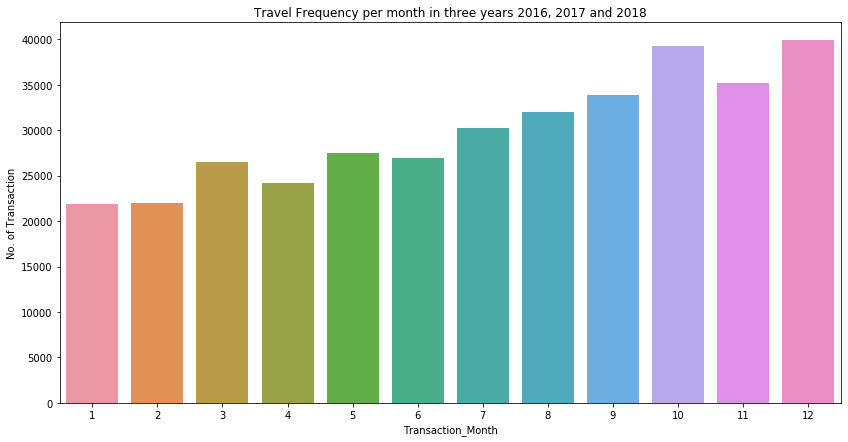

In [139]:
plt.figure(figsize=(14,7))
sns.barplot(x=plot1.index,y=plot1.values)
plt.title('Travel Frequency per month in three years 2016, 2017 and 2018')
plt.ylabel('No. of Transaction')
plt.show()

In [140]:
df = pd.DataFrame({'year': ['Jan','Feb','Mar','Apr','May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec'],'AllYear_Transaction': list(plot1), '2016_Transaction': list(plot1_2016), '2017_Transaction': list(plot1_2017), '2018_Transaction': list(plot1_2018)})
df.head()


,year,AllYear_Transaction,2016_Transaction,2017_Transaction,2018_Transaction
0,Jan,21842,6096,8573,7173
1,Feb,22031,7045,7439,7547
2,Mar,26478,7688,9767,9023
3,Apr,24195,7287,8544,8364
4,May,27459,8140,9579,9740


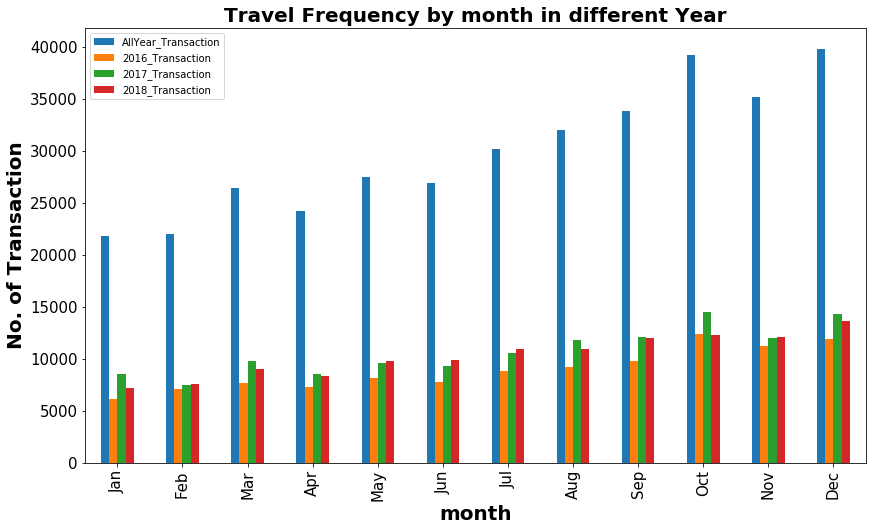

In [165]:
ax = df.plot(x='year', kind ='bar', stacked = False, figsize = (14,8))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
ax.set_title("Travel Frequency by month in different Year",fontsize = 20, color = 'black', weight="bold")
ax.set_ylabel("No. of Transaction", fontsize = 20, color = 'black', weight="bold")
ax.set_xlabel("month", fontsize = 20, color ='black', weight="bold")
plt.show()

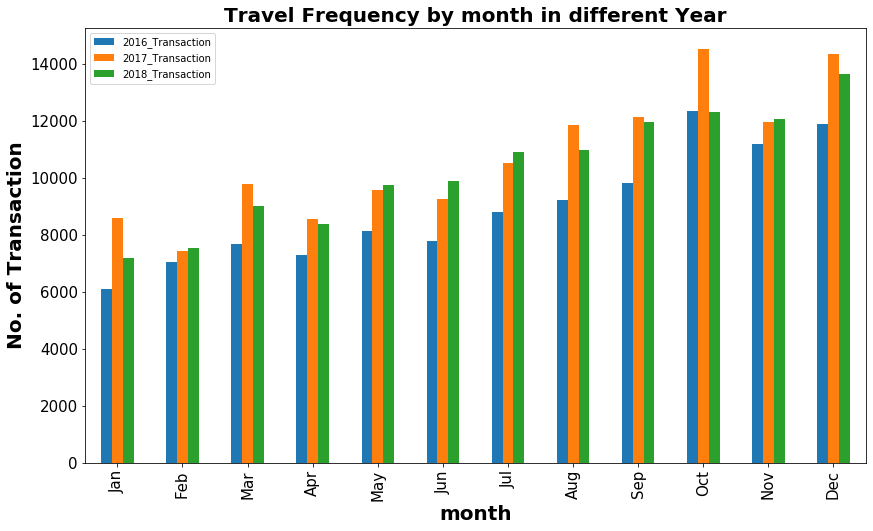

In [166]:
ax2 = df.iloc[:,[0,2,3,4]].plot(x='year', kind ='bar', stacked = False, figsize = (14,8))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
ax2.set_title("Travel Frequency by month in different Year",fontsize = 20, color = 'black', weight="bold")
ax2.set_ylabel("No. of Transaction", fontsize = 20, color = 'black', weight="bold")
ax2.set_xlabel("month", fontsize = 20, color ='black', weight="bold")
plt.show()

### Conclusion_1: Clearly there is an increase in use of cab service towards the end of the year

## ------------------------end-------------

## Hypothesis 2: Is there an increase in the demand for cab service over time (year)

In [173]:
master_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Transaction_Month,Transaction_Year
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813,8,2016
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813,7,2018
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813,11,2018
3,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237,6,2016
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237,4,2018


In [183]:
plot2 = master_df.groupby(['Transaction_Year'])['Transaction ID'].count()
plot2

Transaction_Year
2016    107319
2017    128510
2018    123563
Name: Transaction ID, dtype: int64

In [196]:
plot2[2017]

128510

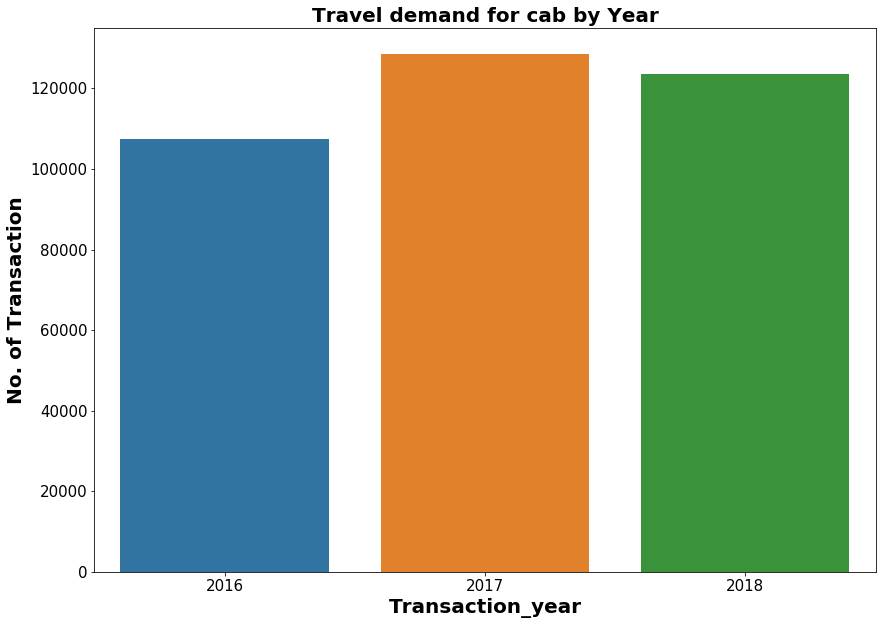

In [184]:
plt.figure(figsize=(14,10))
sns.barplot(x= plot2.index,y=plot2.values)
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize =15)
plt.title('Travel demand for cab by Year', fontsize = 20, color ='black', weight="bold")
plt.ylabel('No. of Transaction', fontsize = 20, color ='black', weight="bold")
plt.xlabel('Transaction_year',fontsize = 20, color ='black', weight="bold")
plt.show()

- HO: There is no difference in the change for the demand of cabs over three years
- H1: There is a substantial difference
- Applying t-test for different pairs of year

In [185]:
import scipy.stats as stats

In [225]:
t_test_2016_17_stat, t_test_2016_17_p_value = stats.ttest_ind(a=plot1_2016.values, b = plot1_2017.values, equal_var = True)
t_test_2016_18_stat, t_test_2016_18_p_value = stats.ttest_ind(a=plot1_2016.values, b = plot1_2018.values, equal_var = True)
t_test_2017_18_stat, t_test_2017_18_p_value = stats.ttest_ind(a=plot1_2017.values, b = plot1_2018.values, equal_var = True)

print("t_test_2016_17_p_value", t_test_2016_17_p_value, "t_test_2016_18_p_value", t_test_2016_18_p_value, "t_test_2017_18_p_value", t_test_2017_18_p_value)

t_test_2016_17_p_value 0.056198289158659535 t_test_2016_18_p_value 0.1138920161875547 t_test_2017_18_p_value 0.6438413980462139


### Conclusion 2: Cab Service demand remains pretty consistent for 3 consecutive years with a slight jump from 2016 to 2017 but returning back to normal

### -----------------------------------END-----------------------------------

## Hypothesis 3: Both the companies (Pink Cab and Blue Cab) have different share in the market

In [226]:
plot3 = master_df.groupby(['Company'])['Transaction ID'].count()
plot3

Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction ID, dtype: int64

In [228]:
plot3_month = master_df.groupby(['Company', 'Transaction_Month'])['Transaction ID'].count()
plot3_month

Company     Transaction_Month
Pink Cab    1                     4734
            2                     4693
            3                     5724
            4                     5118
            5                     6150
            6                     6371
            7                     7048
            8                     8011
            9                     8518
            10                    9936
            11                    8679
            12                    9729
Yellow Cab  1                    17108
            2                    17338
            3                    20754
            4                    19077
            5                    21309
            6                    20568
            7                    23177
            8                    24027
            9                    25377
            10                   29273
            11                   26538
            12                   30135
Name: Transaction ID, dtype: int64

In [229]:
plot3_month_year = master_df.groupby(['Company','Transaction_Year','Transaction_Month'])['Transaction ID'].count()
plot3_month_year

Company     Transaction_Year  Transaction_Month
Pink Cab    2016              1                     1290
                              2                     1467
                              3                     1660
                              4                     1548
                              5                     1792
                                                   ...  
Yellow Cab  2018              8                     8246
                              9                     8945
                              10                    9196
                              11                    9060
                              12                   10334
Name: Transaction ID, Length: 72, dtype: int64

In [230]:
plot3_year = master_df.groupby(['Company','Transaction_Year'])['Transaction ID'].count()
plot3_year

Company     Transaction_Year
Pink Cab    2016                25080
            2017                30321
            2018                29310
Yellow Cab  2016                82239
            2017                98189
            2018                94253
Name: Transaction ID, dtype: int64

In [231]:
plot3_year.index

MultiIndex([(  'Pink Cab', 2016),
            (  'Pink Cab', 2017),
            (  'Pink Cab', 2018),
            ('Yellow Cab', 2016),
            ('Yellow Cab', 2017),
            ('Yellow Cab', 2018)],
           names=['Company', 'Transaction_Year'])

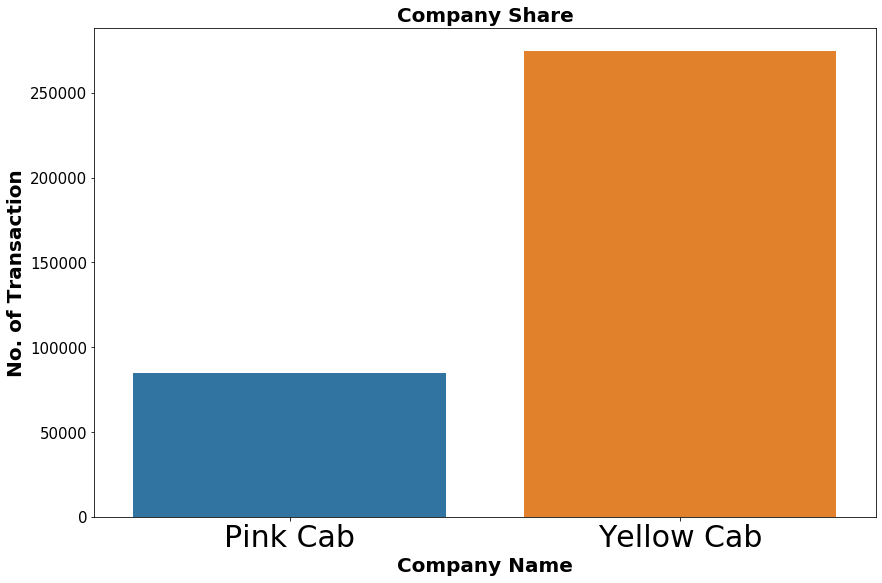

In [243]:
plt.figure(figsize=(14,9))
sns.barplot(x=plot3.index,y=plot3.values)
plt.rc('xtick', labelsize= 20)
plt.title('Company Share', fontsize=20, weight ='bold')
plt.ylabel('No. of Transaction',fontsize=20, weight ='bold')
plt.xlabel('Company Name',fontsize=20, weight ='bold')
plt.show()

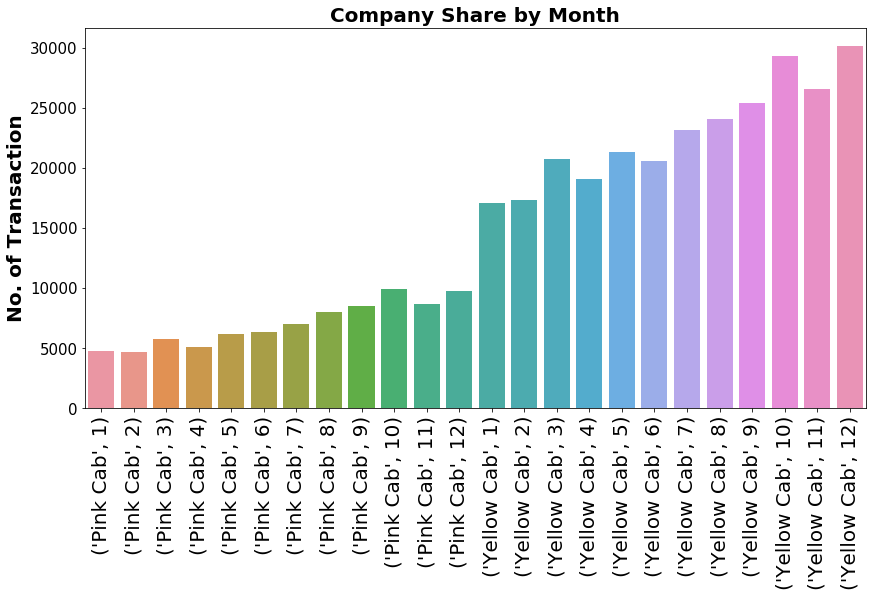

In [269]:
plt.figure(figsize=(14,7))
sns.barplot(x=plot3_month.index,y=plot3_month.values)
plt.title('Company Share by Month', fontsize = 20, weight ='bold')
plt.ylabel('No. of Transaction', fontsize = 20, weight ='bold')
plt.xticks(rotation=90)
plt.show()

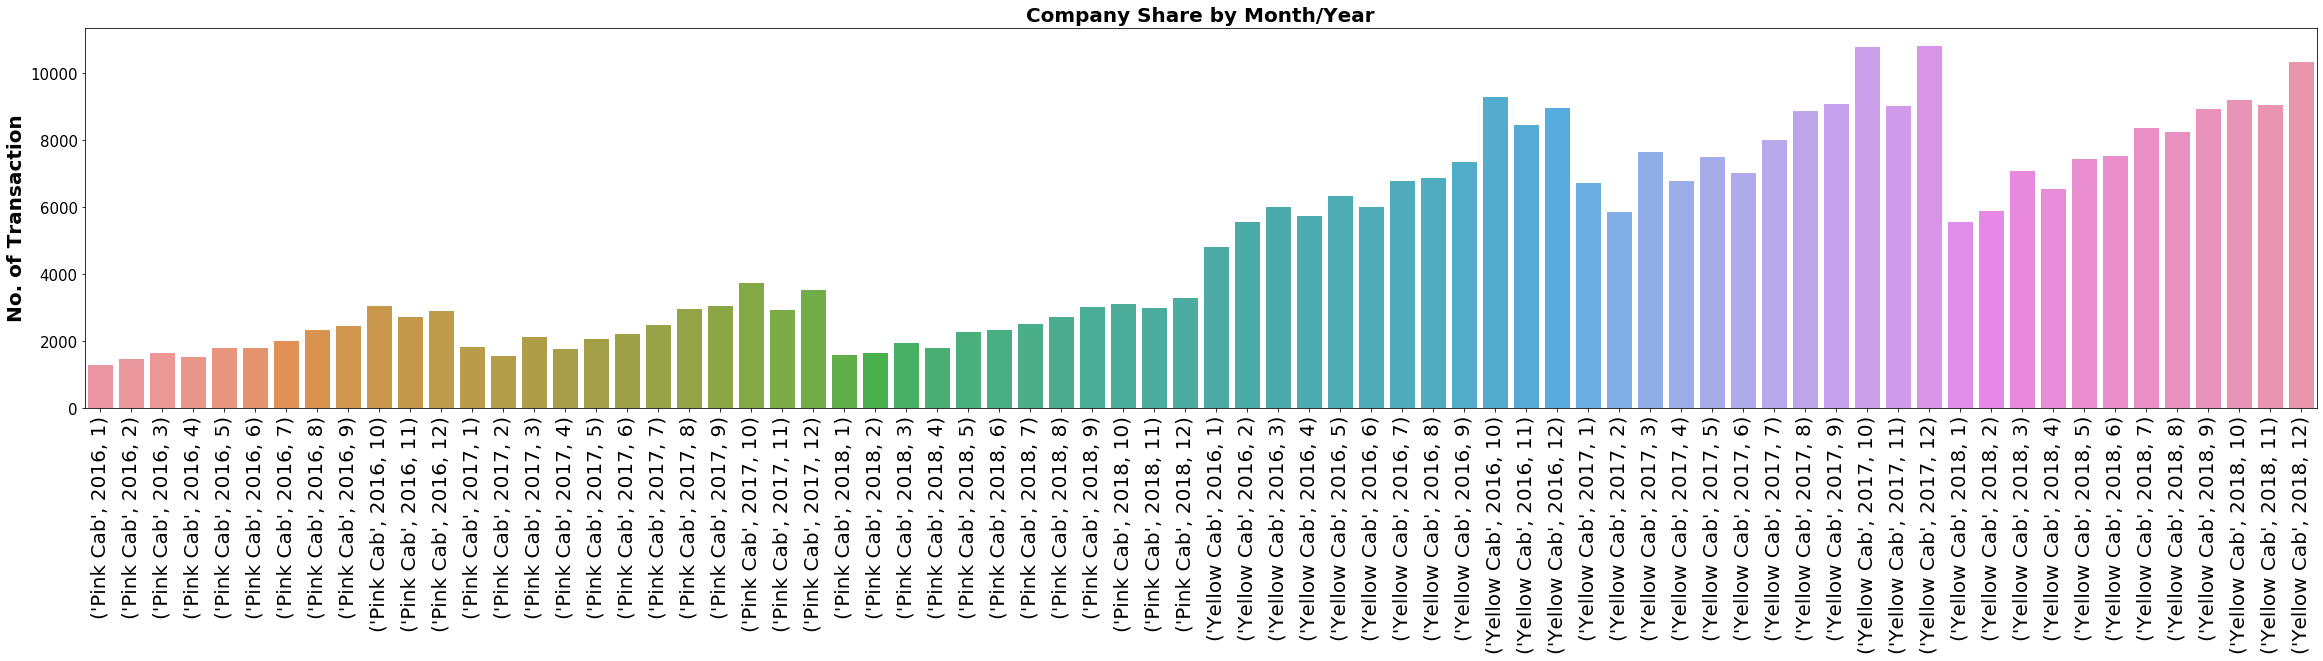

In [270]:
plt.figure(figsize=(40,7))
sns.barplot(x=plot3_month_year.index,y=plot3_month_year.values)
plt.title('Company Share by Month/Year', weight = 'bold', fontsize = 20)
plt.ylabel('No. of Transaction', weight = 'bold', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

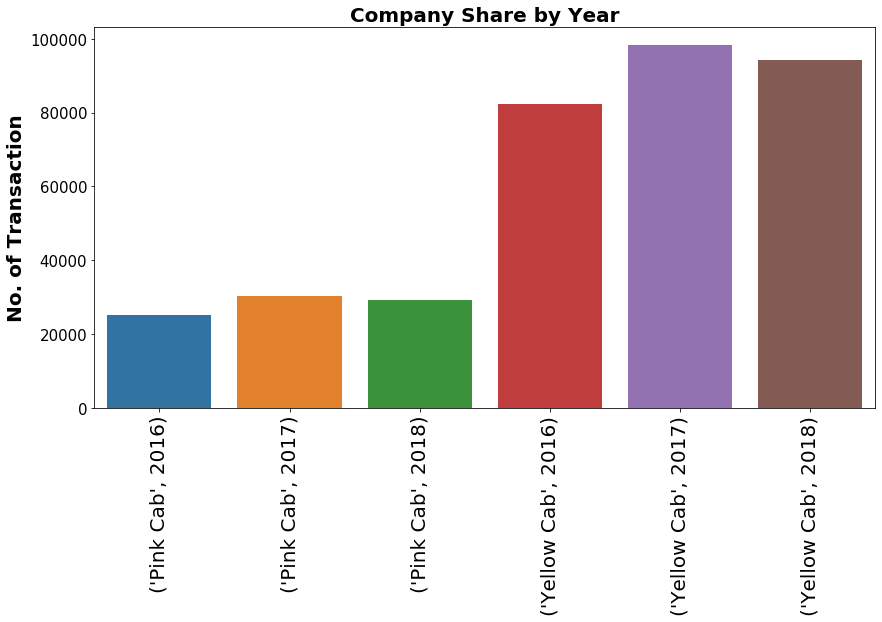

In [271]:
plt.figure(figsize=(14,7))
sns.barplot(x=plot3_year.index,y=plot3_year.values)
plt.title('Company Share by Year', fontsize=20, weight = 'bold')
plt.ylabel('No. of Transaction', fontsize = 20, weight ='bold')
plt.xticks(rotation=90)
plt.show()

In [285]:
#plot3_year_2016_18 =[]
plot3_pink_2016_18 = [int(plot3_year['Pink Cab', 2016]),int(plot3_year['Pink Cab', 2017]), int(plot3_year['Pink Cab', 2018])]
plot3_yellow_2016_18 = [int(plot3_year['Yellow Cab', 2016]),int(plot3_year['Yellow Cab', 2017]), int(plot3_year['Yellow Cab', 2018])]

In [288]:
t_test_pinkyellow_16_18_stat, t_test_pinkyellow_16_18_p_value = stats.ttest_ind(a=plot3_pink_2016_18, b = plot3_yellow_2016_18, equal_var = True)
print("t_test_pinkyellow_16_18_stat",t_test_pinkyellow_16_18_stat,"t_test_pinkyellow_16_18_p_value",t_test_pinkyellow_16_18_p_value)

t_test_pinkyellow_16_18_stat -12.517900742261334 t_test_pinkyellow_16_18_p_value 0.00023429908646523177


### Conclusion: 
- Yellow cab has 3.2X share than Pink cab in the market
- At any given time period, yellow cab has more share than pink cab
- Respective Market share of both pink and yellow cab remained constant for 3 consecutive years
- Market Share of both pink and yellow cab increases towards the end of year and this pattern is persistent over 3 years

### -------------------------End-----------------------------

## Hypothesis 4: Are there regions with preference to pink or yellow cab?

In [289]:
plot4 = master_df.groupby(['City','Company'])['Transaction ID'].count()
plot4

City            Company   
ATLANTA GA      Pink Cab       1762
                Yellow Cab     5795
AUSTIN TX       Pink Cab       1868
                Yellow Cab     3028
BOSTON MA       Pink Cab       5186
                Yellow Cab    24506
CHICAGO IL      Pink Cab       9361
                Yellow Cab    47264
DALLAS TX       Pink Cab       1380
                Yellow Cab     5637
DENVER CO       Pink Cab       1394
                Yellow Cab     2431
LOS ANGELES CA  Pink Cab      19865
                Yellow Cab    28168
MIAMI FL        Pink Cab       2002
                Yellow Cab     4452
NASHVILLE TN    Pink Cab       1841
                Yellow Cab     1169
NEW YORK NY     Pink Cab      13967
                Yellow Cab    85918
ORANGE COUNTY   Pink Cab       1513
                Yellow Cab     2469
PHOENIX AZ      Pink Cab        864
                Yellow Cab     1200
PITTSBURGH PA   Pink Cab        682
                Yellow Cab      631
SACRAMENTO CA   Pink Cab       1334
 

In [290]:
plot4_df = plot4.unstack()
plot4_df

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1762,5795
AUSTIN TX,1868,3028
BOSTON MA,5186,24506
CHICAGO IL,9361,47264
DALLAS TX,1380,5637
DENVER CO,1394,2431
LOS ANGELES CA,19865,28168
MIAMI FL,2002,4452
NASHVILLE TN,1841,1169


In [291]:
plot4_df['Yellow Cab/Pink Cab'] = plot4_df['Yellow Cab']/plot4_df['Pink Cab']

In [292]:
plot4_df

Company,Pink Cab,Yellow Cab,Yellow Cab/Pink Cab
City,,,
ATLANTA GA,1762,5795,3.288876
AUSTIN TX,1868,3028,1.620985
BOSTON MA,5186,24506,4.725415
CHICAGO IL,9361,47264,5.049033
DALLAS TX,1380,5637,4.084783
DENVER CO,1394,2431,1.743902
LOS ANGELES CA,19865,28168,1.417971
MIAMI FL,2002,4452,2.223776
NASHVILLE TN,1841,1169,0.634981


In [293]:
plot4_df_less_0_point_7 = plot4_df[plot4_df['Yellow Cab/Pink Cab'] <= 0.7]
plot4_df_less_0_point_7

Company,Pink Cab,Yellow Cab,Yellow Cab/Pink Cab
City,,,
NASHVILLE TN,1841,1169,0.634981


In [294]:
plot4_df_0_point_7_to_1_point_3 = plot4_df[(plot4_df['Yellow Cab/Pink Cab'] > 0.7) & (plot4_df['Yellow Cab/Pink Cab'] <= 1.3)]
plot4_df_0_point_7_to_1_point_3 

Company,Pink Cab,Yellow Cab,Yellow Cab/Pink Cab
City,,,
PITTSBURGH PA,682,631,0.925220
SACRAMENTO CA,1334,1033,0.774363
SAN DIEGO CA,10672,9816,0.919790
SILICON VALLEY,3797,4722,1.243613


In [295]:
plot4_df_1_point_3_to_6 = plot4_df[(plot4_df['Yellow Cab/Pink Cab'] > 1.3) & (plot4_df['Yellow Cab/Pink Cab'] <= 6.0)]
plot4_df_1_point_3_to_6

Company,Pink Cab,Yellow Cab,Yellow Cab/Pink Cab
City,,,
ATLANTA GA,1762,5795,3.288876
AUSTIN TX,1868,3028,1.620985
BOSTON MA,5186,24506,4.725415
CHICAGO IL,9361,47264,5.049033
DALLAS TX,1380,5637,4.084783
DENVER CO,1394,2431,1.743902
LOS ANGELES CA,19865,28168,1.417971
MIAMI FL,2002,4452,2.223776
ORANGE COUNTY,1513,2469,1.631857


In [296]:
plot4_df_0_point_7_to_1_point_3 .index

Index(['PITTSBURGH PA', 'SACRAMENTO CA', 'SAN DIEGO CA', 'SILICON VALLEY'], dtype='object', name='City')

In [297]:
plot4_df_greater_6 = plot4_df[plot4_df['Yellow Cab/Pink Cab'] > 6]
plot4_df_greater_6

Company,Pink Cab,Yellow Cab,Yellow Cab/Pink Cab
City,,,
NEW YORK NY,13967,85918,6.151500
WASHINGTON DC,3692,40045,10.846425


[]

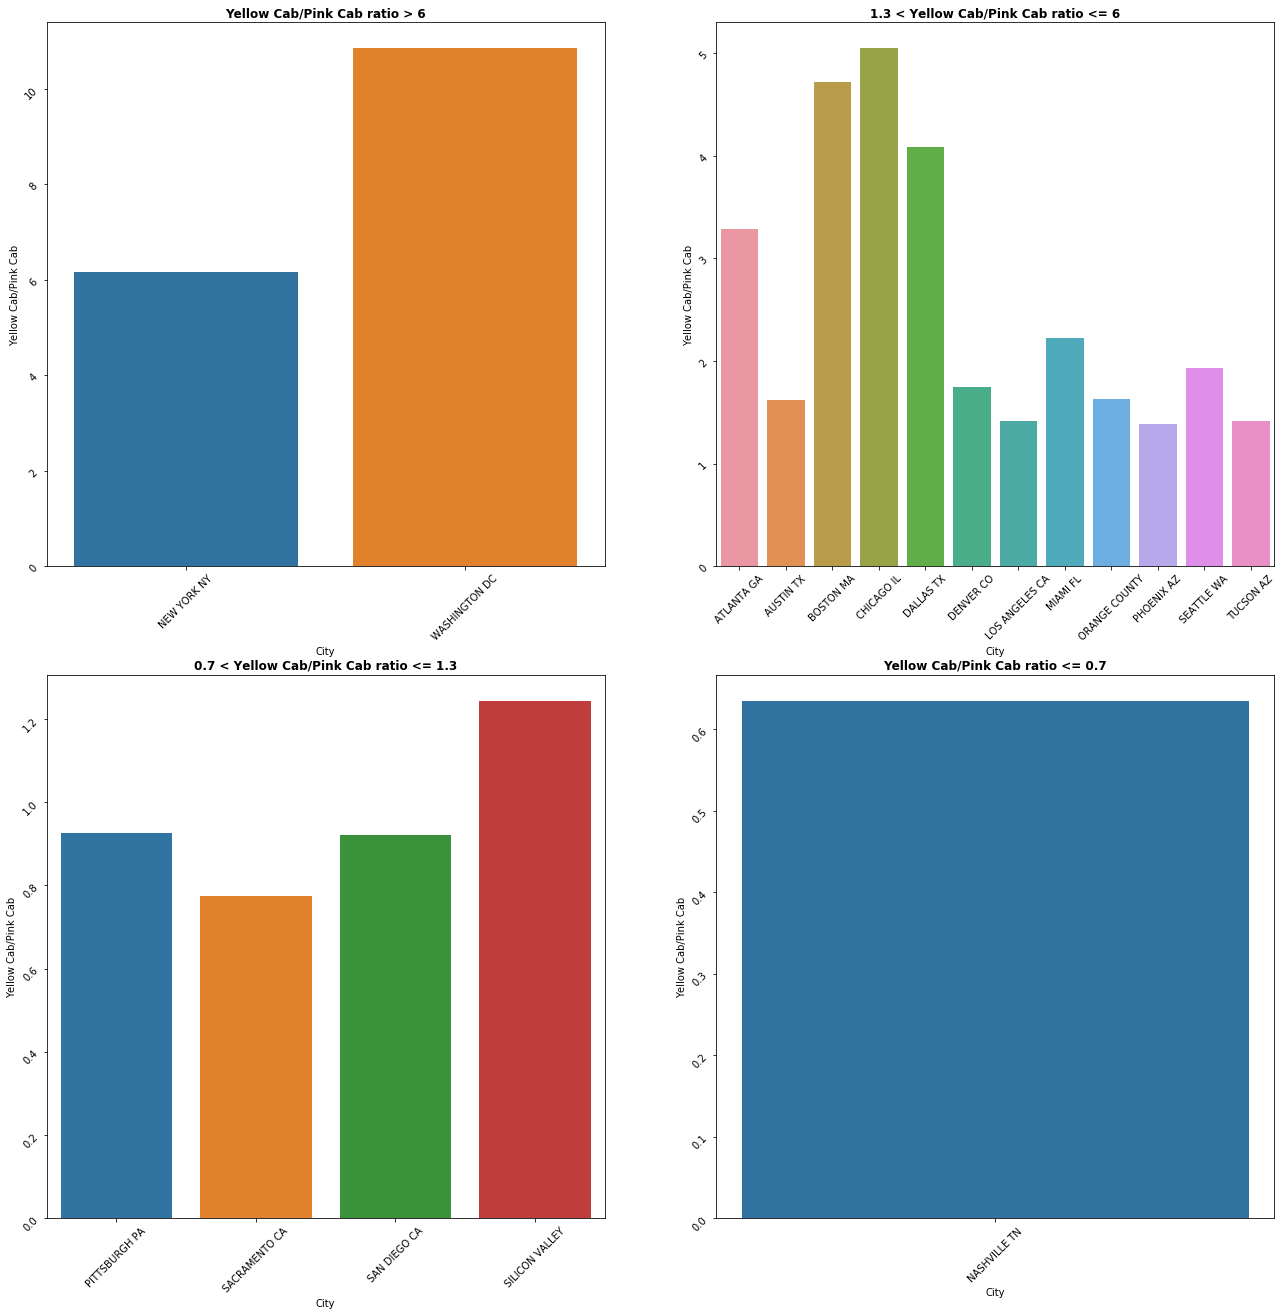

In [313]:
fig, axes = plt.subplots(2,2,figsize=(22,22))
sns.barplot(x=plot4_df_greater_6.index,y=plot4_df_greater_6['Yellow Cab/Pink Cab'],ax=axes[0,0])
axes[0,0].set_title('Yellow Cab/Pink Cab ratio > 6', weight ='bold')
axes[0,0].tick_params(rotation=45, labelsize = 10)
sns.barplot(x=plot4_df_1_point_3_to_6.index,y=plot4_df_1_point_3_to_6['Yellow Cab/Pink Cab'], ax=axes[0,1])
axes[0,1].set_title('1.3 < Yellow Cab/Pink Cab ratio <= 6', weight ='bold')
axes[0,1].tick_params(rotation=45,  labelsize = 10)
sns.barplot(x=plot4_df_0_point_7_to_1_point_3.index,y=plot4_df_0_point_7_to_1_point_3['Yellow Cab/Pink Cab'],ax=axes[1,0])
axes[1,0].set_title('0.7 < Yellow Cab/Pink Cab ratio <= 1.3', weight ='bold')
axes[1,0].tick_params(rotation=45,  labelsize = 10)
sns.barplot(x=plot4_df_less_0_point_7.index,y=plot4_df_less_0_point_7['Yellow Cab/Pink Cab'],ax=axes[1,1])
axes[1,1].set_title('Yellow Cab/Pink Cab ratio <= 0.7', weight ='bold')
axes[1,1].tick_params(rotation=45,  labelsize = 10)
plt.plot()

### Conclusion: 
#### Yellow Cab seems to be dominating in most of the cities with following pattern: 
- only 1 city 'NASHVILLE TN': has slight inclination towards using Pink Cab
- 4 cities: 'PITTSBURGH PA', 'SACRAMENTO CA', 'SAN DIEGO CA', 'SILICON VALLEY' having similar/slightly higher preference for Yellow Cab over Pink Cab 
- 12 cities: 'ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX', 'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'ORANGE COUNTY','PHOENIX AZ', 'SEATTLE WA', 'TUCSON AZ' have high preference for Yellow Cab over Pink Cab 
- 2 Cities: 'New York NY', 'Washington DC' have very extremely high preference for yellow cab over pink cab

### ----------------End----------------

## Hypothesis 6: Cost of Trip and Price charged are city specific?

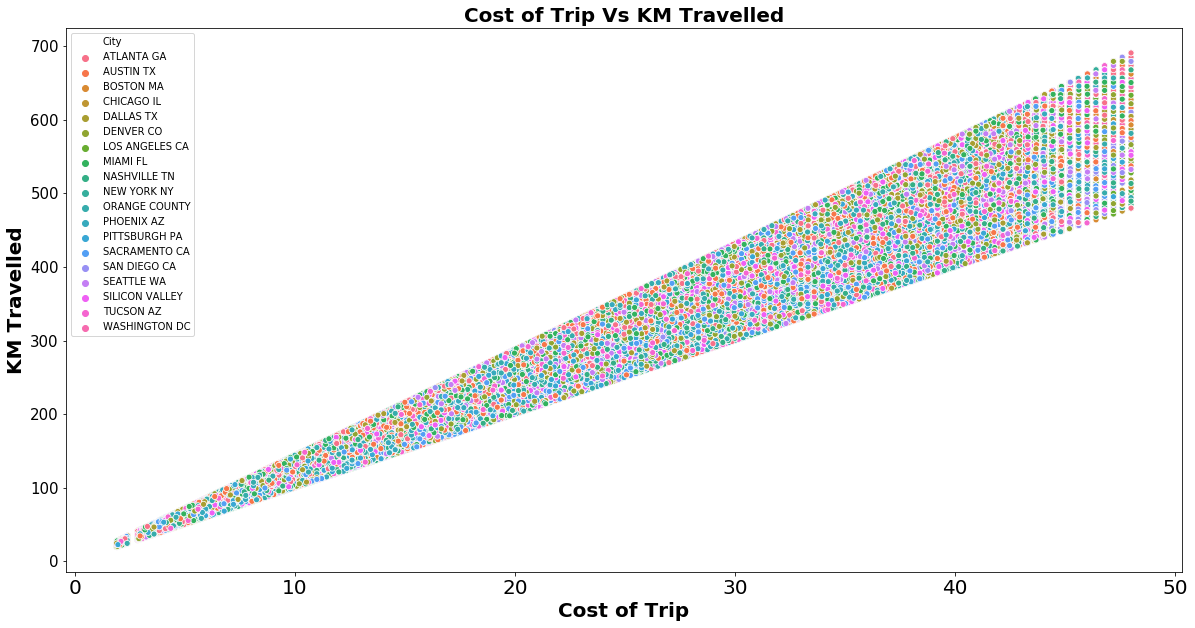

In [315]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=master_df, x="KM Travelled", y="Cost of Trip", hue="City")
plt.xlabel("Cost of Trip", fontsize = 20, weight = 'bold')
plt.ylabel("KM Travelled", fontsize = 20, weight = 'bold')
plt.title("Cost of Trip Vs KM Travelled", fontsize = 20, weight = 'bold')
plt.show()

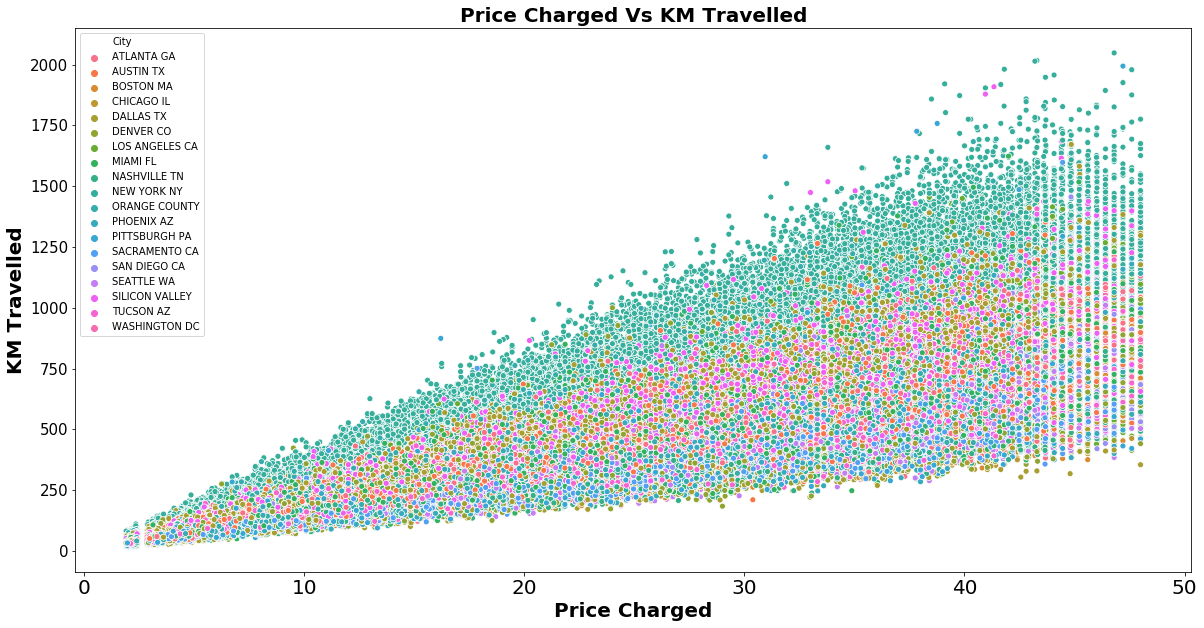

In [316]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=master_df, x="KM Travelled", y="Price Charged", hue="City")
plt.xlabel("Price Charged", fontsize = 20, weight = 'bold')
plt.ylabel("KM Travelled", fontsize = 20, weight = 'bold')
plt.title("Price Charged Vs KM Travelled", fontsize = 20, weight = 'bold')
plt.show()

### Conclusion: 
- Cost of trip is directly proportional to the distance travelled 
- Cost of trip is independent of the city 
- price charged, although proportional to distance, is higher for New York (NY) city

#### --------- END -------

## Hypothesis 7: Mode of transaction influences the preference for Yellow vs Pink cab and There is a bias for different gender and age for different cab

In [317]:
#introducing margin_profit
master_df['margin_pro'] = master_df['Price Charged'] - master_df['Cost of Trip']

In [318]:
master_df.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Transaction_Month,Transaction_Year,margin_pro
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813,8,2016,57.3150
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813,7,2018,281.2772
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813,11,2018,194.6480


In [319]:
plot5 = master_df.groupby(['Company', 'Payment_Mode'])['Price Charged'].agg(['mean'])

In [320]:
plot5

mean
Company    Payment_Mode            
Pink Cab   Card          311.197319
           Cash          310.209299
Yellow Cab Card          457.924979
           Cash          458.567368

In [321]:
plot6 = master_df.groupby(['Company', 'Payment_Mode'])['Cost of Trip'].agg(['mean'])

In [322]:
plot6

mean
Company    Payment_Mode            
Pink Cab   Card          248.487037
           Cash          247.643827
Yellow Cab Card          297.946353
           Cash          297.885494

In [323]:
plot7 = master_df.groupby(['Company', 'Gender'])['Cost of Trip'].agg(['mean'])
plot7

mean
Company    Gender            
Pink Cab   Female  248.444121
           Male    247.914237
Yellow Cab Female  298.266214
           Male    297.670378

In [324]:
plot8 = master_df.groupby(['Company', 'Gender'])['Price Charged'].agg(['mean'])
plot8

mean
Company    Gender            
Pink Cab   Female  310.624823
           Male    310.940547
Yellow Cab Female  454.571538
           Male    460.821326

In [413]:
companies_profit = plot8 - plot7 
companies_profit

mean
Company    Gender            
Pink Cab   Female   62.180701
           Male     63.026310
Yellow Cab Female  156.305325
           Male    163.150948

### Observation 1
- On average yellow cab charges less for female compared to men
- Pink Cab earns less profit as compared to Yellow Cab

In [325]:
plot9 = master_df.groupby(['Company','Gender'])['Gender'].count()
plot9

Company     Gender
Pink Cab    Female     37480
            Male       47231
Yellow Cab  Female    116000
            Male      158681
Name: Gender, dtype: int64

In [326]:
plot10 = master_df.groupby(['Company','Gender'])['Customer ID'].nunique()
plot10

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64

In [327]:
male_yellow_idtotal = list(master_df[(master_df['Gender']=='Male')& (master_df['Company']=='Yellow Cab')]['Customer ID'].unique())
male_pink_idtotal = list(master_df[(master_df['Gender']=='Male')& (master_df['Company']=='Pink Cab')]['Customer ID'].unique())
female_yellow_idtotal = list(master_df[(master_df['Gender']=='Female')& (master_df['Company']=='Yellow Cab')]['Customer ID'].unique())
female_pink_idtotal = list(master_df[(master_df['Gender']=='Female')& (master_df['Company']=='Pink Cab')]['Customer ID'].unique())
#plot11

In [328]:
len(set(male_yellow_idtotal) & set(male_pink_idtotal))

14338

In [329]:
len(set(male_yellow_idtotal))

21502

In [330]:
len(set(male_pink_idtotal))

17511

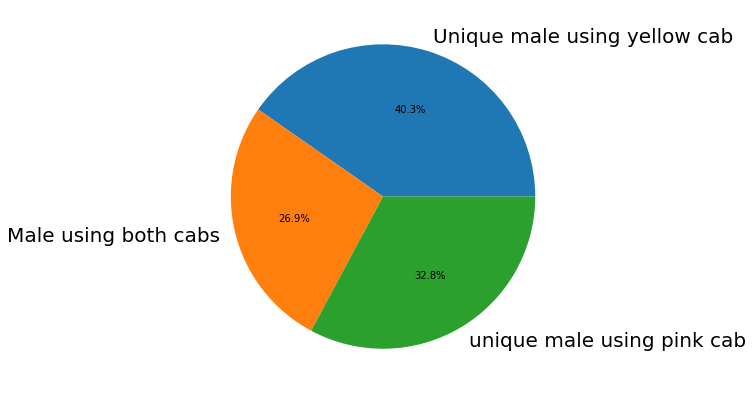

In [337]:
plt.figure(figsize=(7,7))
label = "Unique male using yellow cab", "Male using both cabs", "unique male using pink cab"
plt.pie([len(set(male_yellow_idtotal)),len(set(male_yellow_idtotal) & set(male_pink_idtotal)), len(set(male_pink_idtotal))], labels = label, autopct='%1.1f%%')
plt.show()


In [333]:
common_male_yellow_pink = set(male_yellow_idtotal) & set(male_pink_idtotal)

In [334]:
plot11 = master_df[master_df['Customer ID'].isin(list(common_male_yellow_pink))].groupby(['Company'])['Transaction ID'].count()

In [335]:
plot11

Company
Pink Cab       42938
Yellow Cab    136764
Name: Transaction ID, dtype: int64

Text(0.5, 1.0, 'Distribution of male population using both cab service')

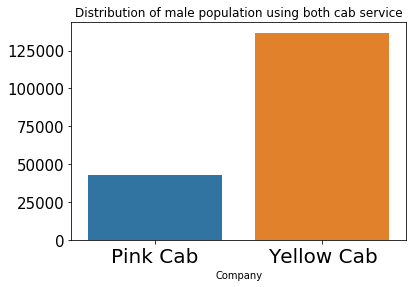

In [336]:
sns.barplot(x=plot11.index,y=plot11.values)
plt.title("Distribution of male population using both cab service")

### Observation 2: 
- Male who are using both yellow and Pink cab service, still prefers to use yellow cab ~3 times more

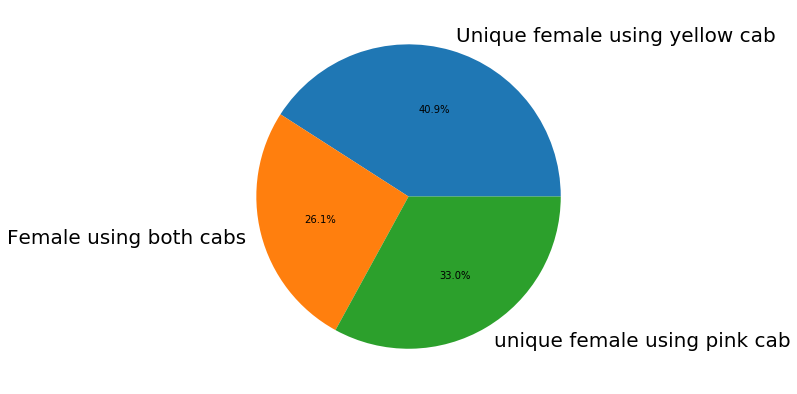

In [338]:
plt.figure(figsize=(7,7))
label = "Unique female using yellow cab", "Female using both cabs", "unique female using pink cab"
plt.pie([len(set(female_yellow_idtotal)),len(set(female_yellow_idtotal) & set(female_pink_idtotal)), len(set(female_pink_idtotal))], labels = label, autopct='%1.1f%%')
plt.show()

In [339]:
common_female_yellow_pink = set(female_yellow_idtotal) & set(female_pink_idtotal)

In [340]:
plot12 = master_df[master_df['Customer ID'].isin(list(common_female_yellow_pink))].groupby(['Company'])['Transaction ID'].count()
plot12

Company
Pink Cab      33352
Yellow Cab    97464
Name: Transaction ID, dtype: int64

Text(0.5, 1.0, 'Distribution of female population using both cab service')

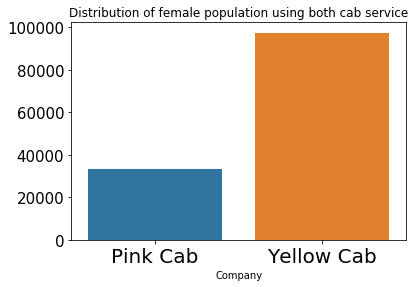

In [341]:
sns.barplot(x=plot12.index,y=plot12.values)
plt.title("Distribution of female population using both cab service")

### Observation 3: 
- Female who are using both yellow and Pink cab, still prefers to use yellow cab ~3 times more. 
- Also looking at the two pie chart above: it seems there is no preference from either male or female population to either use the pink or the yellow cab

## AGE Analysis

In [342]:
plot13 = master_df[master_df.Age > 40].groupby(['Company'])['Price Charged'].agg(['mean'])
plot13

,mean
Company,
Pink Cab,309.163126
Yellow Cab,458.727606


In [343]:
plot14 = master_df[master_df.Age < 40].groupby(['Company'])['Price Charged'].agg(['mean'])
plot14

,mean
Company,
Pink Cab,311.493037
Yellow Cab,458.204902


In [344]:
plot13_age_gender = master_df[master_df.Age > 40].groupby(['Company','Gender'])['Price Charged'].agg(['mean'])
plot13_age_gender

mean
Company    Gender            
Pink Cab   Female  308.262330
           Male    309.883462
Yellow Cab Female  455.105786
           Male    461.353983

In [345]:
plot13_costoftrip = master_df[master_df.Age > 40].groupby(['Company'])['Cost of Trip'].agg(['mean'])
plot13_costoftrip

,mean
Company,
Pink Cab,247.145112
Yellow Cab,298.533559


In [346]:
plot13_costoftrip_age_gender = master_df[master_df.Age > 40].groupby(['Company','Gender'])['Cost of Trip'].agg(['mean'])
plot13_costoftrip_age_gender

mean
Company    Gender            
Pink Cab   Female  246.614808
           Male    247.569178
Yellow Cab Female  299.661096
           Male    297.715922

In [347]:
plot14_age_gender = master_df[master_df.Age < 40].groupby(['Company','Gender'])['Price Charged'].agg(['mean'])
plot14_age_gender

mean
Company    Gender            
Pink Cab   Female  311.545847
           Male    311.451104
Yellow Cab Female  454.294528
           Male    461.073072

In [348]:
plot14_costoftrip = master_df[master_df.Age < 40].groupby(['Company'])['Cost of Trip'].agg(['mean'])
plot14_costoftrip

,mean
Company,
Pink Cab,248.521863
Yellow Cab,297.721335


In [349]:
plot14_costoftrip_age_gender = master_df[master_df.Age < 40].groupby(['Company','Gender'])['Cost of Trip'].agg(['mean'])
plot14_costoftrip_age_gender

mean
Company    Gender            
Pink Cab   Female  249.139804
           Male    248.031203
Yellow Cab Female  297.608490
           Male    297.804104

## Conclusion: 
- No difference in price charged with respect to age is seen between the companies

#### ------------------END--------------

# Analysing the margin profit

In [387]:
plot15 = master_df.groupby(['Company','Transaction_Month'])['margin_pro'].sum()
plot15

Company     Transaction_Month
Pink Cab    1                    2.999893e+05
            2                    3.150796e+05
            3                    4.148589e+05
            4                    2.718107e+05
            5                    3.057689e+05
            6                    3.351366e+05
            7                    3.645796e+05
            8                    4.518069e+05
            9                    5.079008e+05
            10                   6.741666e+05
            11                   5.676949e+05
            12                   7.985355e+05
Yellow Cab  1                    2.963810e+06
            2                    3.146024e+06
            3                    3.576955e+06
            4                    3.212863e+06
            5                    4.073803e+06
            6                    3.663100e+06
            7                    3.411749e+06
            8                    3.258038e+06
            9                    4.050506e+06
    

In [388]:
plot15_df = plot15.unstack()
plot15_df['company_short_name'] = ['Pink','Yellow']
plot15_df.head()

Transaction_Month,1,2,3,4,5,6,7,8,9,10,11,12,company_short_name
Company,,,,,,,,,,,,,
Pink Cab,2.999893e+05,3.150796e+05,414858.861,2.718107e+05,3.057689e+05,335136.590,3.645796e+05,451806.922,5.079008e+05,6.741666e+05,567694.884,7.985355e+05,Pink
Yellow Cab,2.963810e+06,3.146024e+06,3576954.536,3.212863e+06,4.073803e+06,3663100.126,3.411749e+06,3258038.180,4.050506e+06,4.309771e+06,3733023.690,4.620731e+06,Yellow


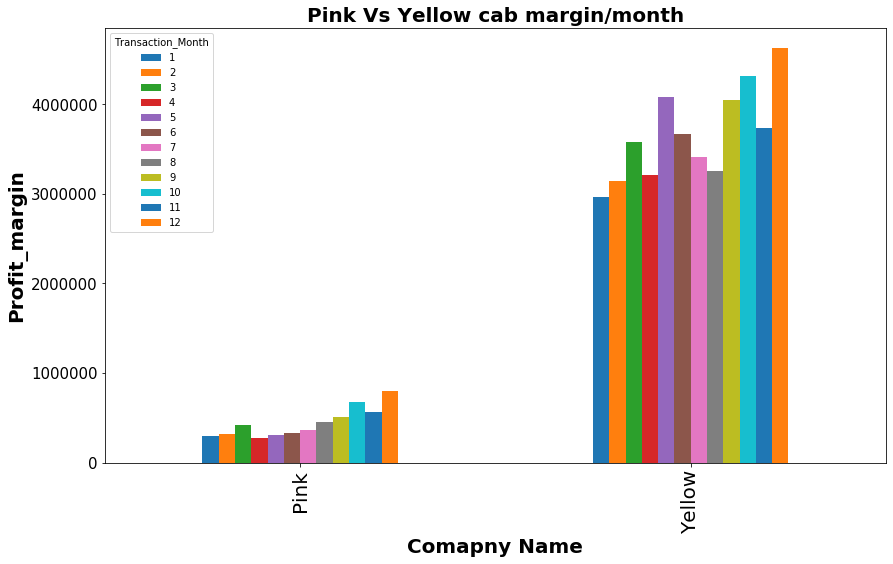

In [389]:
ax2 = plot15_df.plot(x='company_short_name', kind ='bar', stacked = False, figsize = (14,8))
ax2.set_ylabel("Profit_margin", fontsize = 20, weight = 'bold')
ax2.set_xlabel("Comapny Name", fontsize = 20, weight = 'bold')
ax2.set_title('Pink Vs Yellow cab margin/month', fontsize = 20, weight = 'bold')
plt.show()

In [390]:
t_test_pinkcabmargin_stat, t_test_pinkcabmargin_p_value = stats.ttest_ind(a=plot15['Pink Cab'].values, b = plot15['Yellow Cab'].values, equal_var = True)
print("t_test_pinkcabmargin_stat: ",t_test_pinkcabmargin_stat,"t_test_pinkcabmargin_p_value: ",t_test_pinkcabmargin_p_value)
print("\n")

t_test_pinkcabmargin_stat:  -20.86542779645263 t_test_pinkcabmargin_p_value:  5.487011812524601e-16




In [391]:
plot16 = master_df.groupby(['Transaction_Month', 'City'])['margin_pro'].sum()
plot16

Transaction_Month  City          
1                  ATLANTA GA         54541.3904
                   AUSTIN TX          34471.2210
                   BOSTON MA         139159.0214
                   CHICAGO IL        279637.2372
                   DALLAS TX          85030.8306
                                        ...     
12                 SAN DIEGO CA      160200.7232
                   SEATTLE WA         61883.4812
                   SILICON VALLEY    147704.5466
                   TUCSON AZ          14486.1870
                   WASHINGTON DC     312220.8314
Name: margin_pro, Length: 228, dtype: float64

In [392]:
plot16_df = plot16.unstack()
plot16_df

City,ATLANTA GA,AUSTIN TX,BOSTON MA,CHICAGO IL,DALLAS TX,DENVER CO,LOS ANGELES CA,MIAMI FL,NASHVILLE TN,NEW YORK NY,ORANGE COUNTY,PHOENIX AZ,PITTSBURGH PA,SACRAMENTO CA,SAN DIEGO CA,SEATTLE WA,SILICON VALLEY,TUCSON AZ,WASHINGTON DC
Transaction_Month,,,,,,,,,,,,,,,,,,,
1,54541.3904,34471.2210,139159.0214,279637.2372,85030.8306,28235.2094,327392.7362,44267.5570,6557.0062,1.675502e+06,26653.1932,12037.3306,5279.5366,8553.3072,100299.4574,46020.5018,86724.0912,10237.7162,293200.4472
2,62555.0452,26166.7466,131760.9530,290483.5512,75582.6586,22577.7144,323043.8906,37538.0066,9119.1146,1.879108e+06,35613.7582,14945.5122,6859.5708,9436.3558,103208.5986,47781.8992,83636.4024,7260.4302,294425.5022
3,71202.6048,34119.3456,154756.9610,252987.0364,102486.7142,24573.4190,419339.2318,48331.8078,11646.8876,2.171037e+06,35927.1232,17480.2358,5645.8834,11340.9982,138273.6658,41576.9286,97317.3390,18213.2548,335556.6914
4,60975.1562,36682.1850,134537.8972,193412.4158,83937.1920,29503.3320,380679.4696,44766.4584,5429.9660,1.903706e+06,29855.8878,14010.0666,6184.3518,10450.6188,113209.6994,39747.6630,82936.5658,10378.9442,304269.2600
5,70618.5978,47551.6684,140592.7386,345398.8088,110410.2512,37053.8496,391902.3892,49250.4722,11252.0714,2.370502e+06,38986.6104,17594.5344,3700.3756,11552.0922,140437.0978,55376.6188,120092.9654,8420.4492,408877.4602
6,79053.6454,38380.1622,111738.4844,325074.2228,98854.8130,30454.3896,414377.9680,53856.0640,8317.9710,2.182396e+06,44745.1956,13058.8374,9857.3614,8474.0032,107163.8078,57237.3232,110173.9766,11255.8462,293767.0036
7,71278.2000,38367.8286,90191.3074,231864.5896,87504.5332,29796.3170,297996.1426,63742.9712,11133.7204,2.287298e+06,30558.2388,16924.5734,8243.6788,10751.3880,142294.0796,43375.7990,94033.3808,13730.3076,207243.4468
8,55363.1604,44570.3310,134759.1474,240497.4958,98642.1156,35133.7384,317841.9540,62616.9428,9762.2436,2.132988e+06,43799.6988,14528.1962,8055.2934,7212.6958,137115.7708,51378.2294,105280.4194,6703.8682,203595.7142
9,79138.8768,48124.2184,189254.5262,303883.9756,93080.1960,39302.5286,395024.1730,109578.5616,18165.9852,2.565926e+06,43635.1354,17235.0888,9351.3512,10148.0696,153501.5864,53225.1990,121351.8898,14668.3396,293811.1914


In [393]:
master_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Transaction_Month,Transaction_Year,margin_pro
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813,8,2016,57.3150
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813,7,2018,281.2772
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813,11,2018,194.6480
3,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237,6,2016,23.6660
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237,4,2018,253.9808


In [394]:
pink_cab_transaction = master_df[master_df.Company=='Pink Cab'].groupby(['Transaction_Year','Transaction_Month'])["Transaction ID"].count().values
pink_cab_transaction 

array([1290, 1467, 1660, 1548, 1792, 1796, 2018, 2337, 2455, 3073, 2743,
       2901, 1843, 1577, 2122, 1769, 2063, 2222, 2499, 2955, 3047, 3749,
       2944, 3531, 1601, 1649, 1942, 1801, 2295, 2353, 2531, 2719, 3016,
       3114, 2992, 3297])

In [395]:
pink_cab_profit = master_df[master_df.Company=='Pink Cab'].groupby(['Transaction_Year','Transaction_Month'])["margin_pro"].mean()
pink_cab_profit.values

array([64.18715426, 77.84225699, 82.76607289, 64.62325388, 51.12013839,
       57.32460802, 55.39192765, 57.37678391, 60.49925051, 75.70888545,
       78.42761065, 83.53946467, 73.40299349, 66.08283893, 74.80551084,
       50.14547315, 50.97791081, 58.86658146, 55.09910004, 64.01228054,
       65.28365901, 71.54167671, 65.27639436, 91.92728519, 51.1593985 ,
       58.6248393 , 61.13794336, 46.12248084, 47.4920122 , 43.08544411,
       45.4784923 , 47.28248952, 53.20152918, 55.65299518, 53.60770154,
       70.24334395])

In [396]:
pink_pro_trans_df = pd.DataFrame({'pink_transaction':pink_cab_transaction, 'pink_profit_margin': list(pink_cab_profit.values) })
pink_pro_trans_df

,pink_transaction,pink_profit_margin
0,1290,64.187154
1,1467,77.842257
2,1660,82.766073
3,1548,64.623254
4,1792,51.120138
5,1796,57.324608
6,2018,55.391928
7,2337,57.376784
8,2455,60.499251
9,3073,75.708885


In [397]:
pink_pro_trans_df['pink_profit_pertransaction'] = pink_pro_trans_df['pink_profit_margin']/pink_pro_trans_df['pink_transaction']
pink_pro_trans_df

,pink_transaction,pink_profit_margin,pink_profit_pertransaction
0,1290,64.187154,0.049757
1,1467,77.842257,0.053062
2,1660,82.766073,0.049859
3,1548,64.623254,0.041746
4,1792,51.120138,0.028527
5,1796,57.324608,0.031918
6,2018,55.391928,0.027449
7,2337,57.376784,0.024551
8,2455,60.499251,0.024643
9,3073,75.708885,0.024637


In [398]:
yellow_cab_transaction = master_df[master_df.Company=='Yellow Cab'].groupby(['Transaction_Year','Transaction_Month'])["Transaction ID"].count().values
yellow_cab_transaction 

array([ 4806,  5578,  6028,  5739,  6348,  6003,  6776,  6890,  7346,
        9286,  8456,  8983,  6730,  5862,  7645,  6775,  7516,  7035,
        8018,  8891,  9086, 10791,  9022, 10818,  5572,  5898,  7081,
        6563,  7445,  7530,  8383,  8246,  8945,  9196,  9060, 10334])

In [399]:
yellow_cab_profit = master_df[master_df.Company=='Yellow Cab'].groupby(['Transaction_Year','Transaction_Month'])["margin_pro"].mean()
yellow_cab_profit.values

array([190.77892426, 193.73549035, 171.82524851, 174.53914354,
       195.9809702 , 198.93876495, 163.96203158, 133.04915193,
       169.31285598, 149.3381829 , 163.31384981, 157.46099361,
       176.99458579, 189.27287253, 194.50809366, 177.87354875,
       210.09957504, 185.10620986, 153.44404101, 150.16001152,
       166.44039392, 151.45867471, 137.52288552, 161.68072945,
       153.58096626, 162.06339071, 148.87410846, 153.29713972,
       167.97945488, 154.9334042 , 127.69033425, 122.02969449,
       144.71283667, 140.12896755, 122.66118132, 141.00996114])

In [400]:
yellow_pro_trans_df = pd.DataFrame({'yellow_transaction':yellow_cab_transaction, 'yellow_profit_margin': list(yellow_cab_profit.values) })
yellow_pro_trans_df

,yellow_transaction,yellow_profit_margin
0,4806,190.778924
1,5578,193.735490
2,6028,171.825249
3,5739,174.539144
4,6348,195.980970
5,6003,198.938765
6,6776,163.962032
7,6890,133.049152
8,7346,169.312856
9,9286,149.338183


In [401]:
yellow_pro_trans_df['yellow_profit_pertransaction'] = yellow_pro_trans_df['yellow_profit_margin']/yellow_pro_trans_df['yellow_transaction']
yellow_pro_trans_df

,yellow_transaction,yellow_profit_margin,yellow_profit_pertransaction
0,4806,190.778924,0.039696
1,5578,193.735490,0.034732
2,6028,171.825249,0.028505
3,5739,174.539144,0.030413
4,6348,195.980970,0.030873
5,6003,198.938765,0.033140
6,6776,163.962032,0.024197
7,6890,133.049152,0.019310
8,7346,169.312856,0.023048
9,9286,149.338183,0.016082


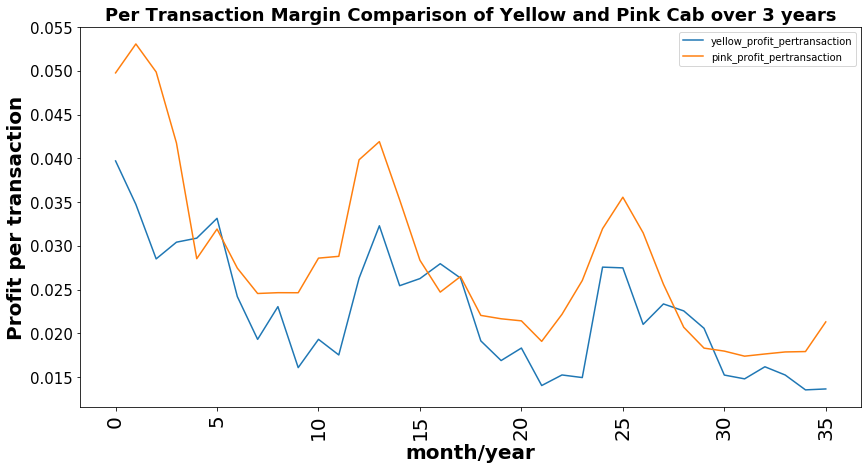

In [402]:
plt.figure(figsize=(14,7))
plt.plot(yellow_pro_trans_df['yellow_profit_pertransaction'], label = 'yellow_profit_pertransaction')
plt.plot(pink_pro_trans_df['pink_profit_pertransaction'], label = 'pink_profit_pertransaction')
plt.ylabel('Profit per transaction', fontsize = 20, weight ='bold')
plt.xlabel('month/year', fontsize = 20, weight = 'bold')
plt.title("Per Transaction Margin Comparison of Yellow and Pink Cab over 3 years", fontsize = 18, weight = 'bold')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()

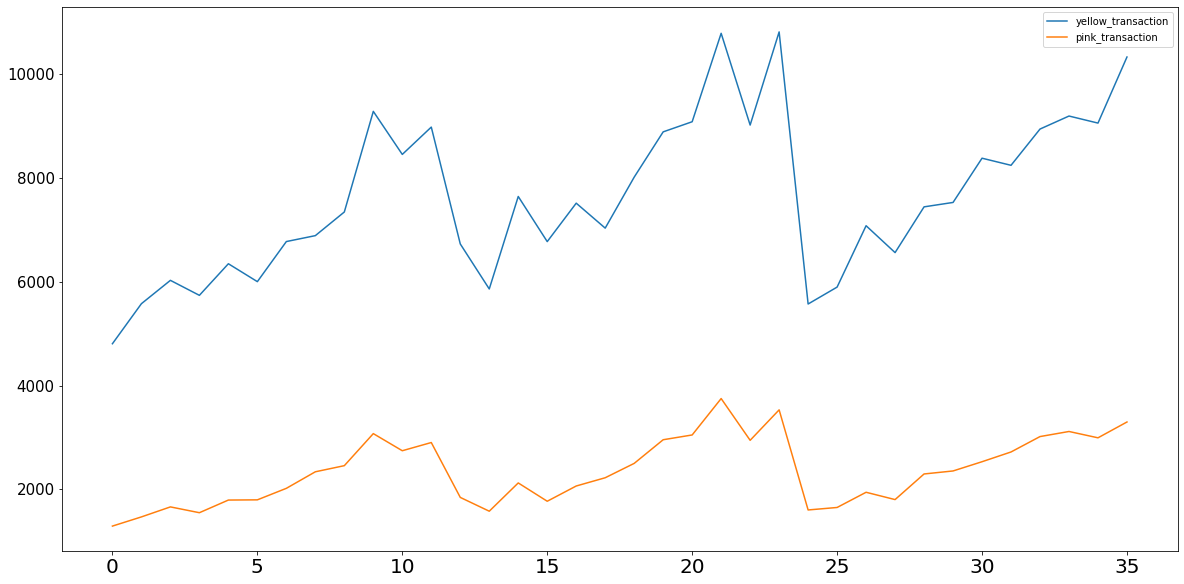

In [406]:
plt.figure(figsize=(20,10))
plt.plot(yellow_pro_trans_df['yellow_transaction'], label = 'yellow_transaction')
plt.plot(pink_pro_trans_df['pink_transaction'], label = 'pink_transaction')
plt.legend(loc='best')

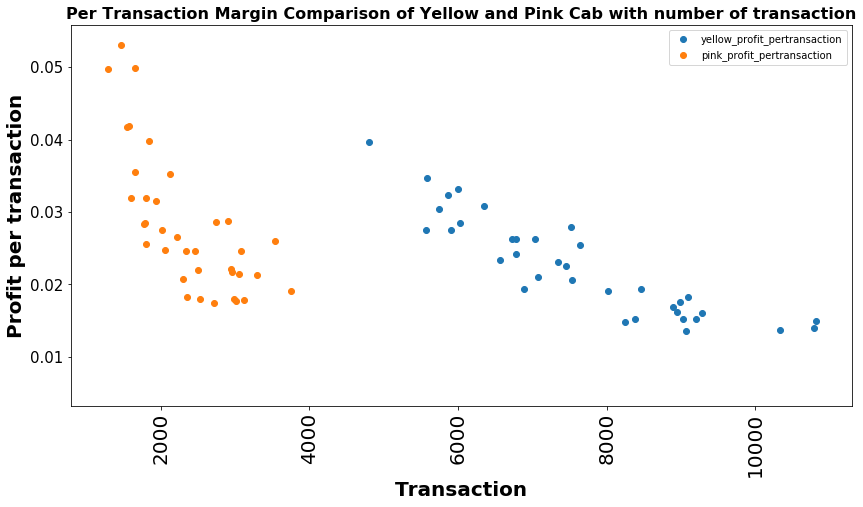

In [410]:
plt.figure(figsize=(14,7))
plt.scatter(yellow_pro_trans_df['yellow_transaction'], yellow_pro_trans_df['yellow_profit_pertransaction'], label = 'yellow_profit_pertransaction')
plt.scatter(pink_pro_trans_df['pink_transaction'],pink_pro_trans_df['pink_profit_pertransaction'], label = 'pink_profit_pertransaction')
plt.ylabel('Profit per transaction', fontsize = 20, weight ='bold')
plt.xlabel('Transaction', fontsize = 20, weight = 'bold')
plt.title("Per Transaction Margin Comparison of Yellow and Pink Cab with number of transaction", fontsize = 16, weight = 'bold')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()

### Conclusion:
- Yellow cab follow a robust strategy where it reduces its profit margin when the number of transaction is high and vice-versa which is a strong business model
- Red Cab fails to address this issue

# Overall Conclusions:

- Yellow Cab continues to maintain its monopoly in the market with consistency for over three years in competition to pink cab
- Pink Cab should start implementing lucrative strategies in 'NASHVILLE TN' where its market share is slightly better than yellow cab
- Yellow cab is charging less to female over male. Pink Cab too should address this factor with discounts for both women and senior citizesn to drive the market share towards itself
- Pink Cab charges less profit over Yellow Cab (Comparing "price charged" Vs "Cost of trips" by Yellow and Pink Cab) which may help them in challenging the monopoly of Yellow company in long run
- Yellow cab follow a robust strategy where it reduces its profit margin when the number of transaction is high and vice-versa which is a strong business model
- Despite "Low-Profit charging" strategy of Pink Cab, It doesn't seem to be a major competitor for Yellow Cab in near future
